# Phenotype phase plane analysis

In [1]:
import matplotlib.pyplot as plt
from cobra.io import read_sbml_model
model=read_sbml_model('models/yeast_lyco.xml')

from cobra.flux_analysis.phenotype_phase_plane import production_envelope

### Increasing glucose concentration in medium

In [2]:
# Renaming IDs for exchange reactions needed
glc_exchange = model.reactions.r_1714
o2_exchange = model.reactions.r_1992
growth = model.reactions.r_2111

In [3]:
medium = model.medium

#Amping glucose levels to 1000.0
medium['r_1714'] = 700
model.reactions.r_1714.bounds = -1000, 0

### Phenotype phase plane for default objective i.e. biomass

In [4]:
ppp_biomass = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=growth)
ppp_biomass

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1714
0,r_1714,0.0,0.0,0.0,14.679623,0.0,0.0,-1000.000000
1,r_1714,0.0,0.0,0.0,15.323794,0.0,0.0,-947.370216
2,r_1714,0.0,0.0,0.0,15.964078,0.0,0.0,-894.740432
3,r_1714,0.0,0.0,0.0,16.604362,0.0,0.0,-842.110648
4,r_1714,0.0,0.0,0.0,17.244646,0.0,0.0,-789.480864
5,r_1714,0.0,0.0,0.0,17.883518,0.0,0.0,-736.851080
6,r_1714,0.0,0.0,0.0,18.522355,0.0,0.0,-684.221296
7,r_1714,0.0,0.0,0.0,19.158407,0.0,0.0,-631.591512
8,r_1714,0.0,0.0,0.0,19.789829,0.0,0.0,-578.961728
9,r_1714,0.0,0.0,0.0,18.933901,0.0,0.0,-526.331944


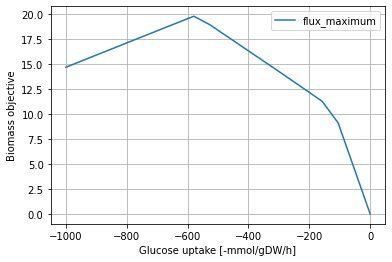

In [29]:
ppp_biomass.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [-mmol/gDW/h]", ylabel="Biomass objective", grid = True)

Very interstingly, it can be seen that at a glucose uptake at -1000, the biomass objective is approximately 15. However, in the file 03_theoretical_yields the biomass objective set at a glucose concentration of 1000 is approx. 20, similar to the biomass optimum. When glucose concentrations in this file is increased beyond 600 to e.g. 700 or 1000 the biomass objective remains at the constant optimum value. This is a discrepancy from the results shown on the phase plane. Thus, everything beyond the optimum on the phase plane does not appear to be reliable based on this observation. 

To further test this assumption, we try with the phaseplane of oxygen vs. biomass. See further down for plot. Here optimum is approx. 300, and biomass is decreased beyond this point. By printing the biomass at oxygen levels of 1000, 300 and 50, we can see how the phase plane works

In [6]:
medium_oxy_ex = model.reactions.get_by_id('r_1992')

In [7]:
medium = model.medium
with model: #modification are done locally within the indent
    growth_rate = model.optimize().objective_value
    print("At oxygen concentration = {}:".format(medium[medium_oxy_ex.id]), "Maximum theoretical growth rate =", growth_rate, "h^-1")
    
    medium[medium_oxy_ex.id] = 300 #oxygen level is changed 
    model.medium = medium
    
    growth_rate = model.optimize().objective_value
    print("At oxygen concentration = {}:".format(medium[medium_oxy_ex.id]), "Maximum theoretical growth rate =", growth_rate, "h^-1")  
    
    medium[medium_oxy_ex.id] = 50 #oxygen level is changed 
    model.medium = medium
    
    growth_rate = model.optimize().objective_value
    print("At oxygen concentration = {}:".format(medium[medium_oxy_ex.id]), "Maximum theoretical growth rate =", growth_rate, "h^-1")    

At oxygen concentration = 1000.0: Maximum theoretical growth rate = 19.816830259464272 h^-1
At oxygen concentration = 300: Maximum theoretical growth rate = 19.816830259464272 h^-1
At oxygen concentration = 50: Maximum theoretical growth rate = 11.840117015113165 h^-1


Based on the results, we can verify the hypothesis that everything beyond the optimum of the phase plane is incorrect. I.e. the biomass objective does not decrease even though the phase plane shows so. 

### Creating a phenotype phase plane for lycopene flux vs. glucose uptake (exchange reaction).

In [8]:
ppp_lycopene = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=model.reactions.CrtI)
ppp_lycopene

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1714
0,r_1714,0.0,0.000000e+00,NaN,24.981325,6.162060e-01,NaN,-1000.000000
1,r_1714,0.0,0.000000e+00,NaN,25.779807,6.712285e-01,NaN,-947.370216
2,r_1714,0.0,0.000000e+00,NaN,25.825441,7.119691e-01,NaN,-894.740432
3,r_1714,0.0,0.000000e+00,NaN,25.825441,7.564654e-01,NaN,-842.110648
4,r_1714,0.0,0.000000e+00,NaN,25.825441,8.068942e-01,NaN,-789.480864
5,r_1714,0.0,0.000000e+00,NaN,25.825441,8.645268e-01,NaN,-736.851080
6,r_1714,0.0,0.000000e+00,NaN,25.825441,9.310256e-01,NaN,-684.221296
7,r_1714,0.0,0.000000e+00,NaN,25.810275,1.008015e+00,NaN,-631.591512
8,r_1714,0.0,0.000000e+00,NaN,25.523052,1.087410e+00,NaN,-578.961728
9,r_1714,0.0,0.000000e+00,NaN,25.167446,1.179478e+00,NaN,-526.331944


(0.0, 30.0)

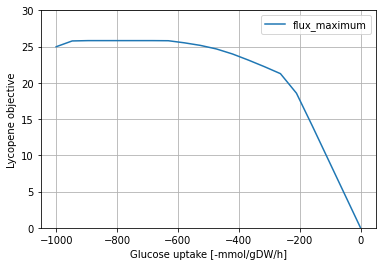

In [26]:
ppp_lycopene.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [mmol/gDW/h]", 
                         ylabel="Lycopene objective", grid=True).set_ylim(0, 30)


### Phenotype phase plane for biomass formation vs. O<sub>2</sub> uptake

In [10]:
ppp_o2 = production_envelope(model,
                            reactions=[o2_exchange],
                            objective=growth)
ppp_o2

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1992
0,r_1714,0.0,0.0,0.0,9.008634,0.0,0.0,-1000.000000
1,r_1714,0.0,0.0,0.0,10.017155,0.0,0.0,-947.368421
2,r_1714,0.0,0.0,0.0,11.025677,0.0,0.0,-894.736842
3,r_1714,0.0,0.0,0.0,12.034198,0.0,0.0,-842.105263
4,r_1714,0.0,0.0,0.0,13.042720,0.0,0.0,-789.473684
5,r_1714,0.0,0.0,0.0,14.051242,0.0,0.0,-736.842105
6,r_1714,0.0,0.0,0.0,15.059763,0.0,0.0,-684.210526
7,r_1714,0.0,0.0,0.0,16.068285,0.0,0.0,-631.578947
8,r_1714,0.0,0.0,0.0,17.076806,0.0,0.0,-578.947368
9,r_1714,0.0,0.0,0.0,18.085328,0.0,0.0,-526.315789


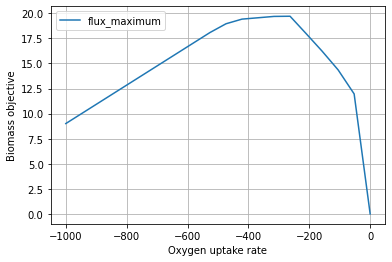

In [11]:
ppp_o2.plot(x='r_1992', y='flux_maximum', xlabel="Oxygen uptake rate [mmol/g DW/h]", ylabel="Biomass objective", grid=True)

### Phenotype phase plane: lycopene vs. O<sub>2</sub> uptake

In [12]:
ppp_lyco_vs_o2 = production_envelope(model,
                    reactions=[o2_exchange],
                    objective=model.reactions.CrtI)
ppp_lyco_vs_o2

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1992
0,r_1714,0.0,0.0,NaN,10.356402,0.696278,NaN,-1000.000000
1,r_1714,0.0,0.0,NaN,11.640099,0.767369,NaN,-947.368421
2,r_1714,0.0,0.0,NaN,12.923797,0.835748,NaN,-894.736842
3,r_1714,0.0,0.0,NaN,14.207494,0.901568,NaN,-842.105263
4,r_1714,0.0,0.0,NaN,15.491191,0.964970,NaN,-789.473684
5,r_1714,0.0,0.0,NaN,16.774888,1.026084,NaN,-736.842105
6,r_1714,0.0,0.0,NaN,18.058585,1.085033,NaN,-684.210526
7,r_1714,0.0,0.0,NaN,19.342282,1.141928,NaN,-631.578947
8,r_1714,0.0,0.0,NaN,20.566721,1.196664,NaN,-578.947368
9,r_1714,0.0,0.0,NaN,21.663213,1.249688,NaN,-526.315789


(0.0, 30.0)

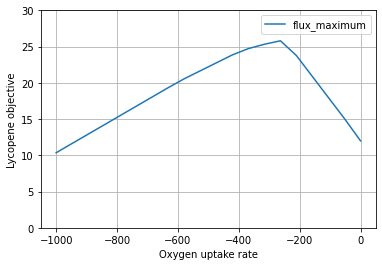

In [27]:
ppp_lyco_vs_o2.plot(x='r_1992', y='flux_maximum', xlabel="Oxygen uptake rate [mmol/g DW/h]", ylabel="Lycopene objective", grid=True).set_ylim(0,30)

It seems as though the yeast is subject to oxygen stress, when the uptake rate is increased above the bound of (i.e. $<-250$).
In addition, as seen on the figure, lycopene production does not reach 0, dispite oxygen uptake reaching 0. This indicates that lycopene can be producted anaerobically, which is not surprising as both G-3-P, Pyruvate and Acetyl-CoA can be produced anaerobically. These are central precusor upstream of the MVA and MEP pathways, which are forming lycopene. Hence, lycopene should still be possible to produce without oxygen, as indicated by the plot

In [14]:
max_biomass_glc = ppp_biomass['flux_maximum'].max()
max_biomass_o2 = ppp_o2['flux_maximum'].max()
max_lycopene_glc = ppp_lycopene['flux_maximum'].max()
max_lycopene_o2 = ppp_lyco_vs_o2['flux_maximum'].max()
max_list = [max_biomass_glc, max_biomass_o2, max_lycopene_glc, max_lycopene_o2]

In [15]:
print("Maxima:\n",
     "Maximum flux towards biomass vs. glucose uptake = ", max_list[0],
     "\nMaximum flux towards biomass vs. O2 uptake = ", max_list[1],
     "\nMaximum flux towards lycopene vs. glucose uptake = ", max_list[2],
     "\nMaximum flux towards lycopene vs. O2 uptake= ", max_list[3], sep='')

Maxima:
Maximum flux towards biomass vs. glucose uptake = 19.78982863013638
Maximum flux towards biomass vs. O2 uptake = 19.709790744611283
Maximum flux towards lycopene vs. glucose uptake = 25.825440917107585
Maximum flux towards lycopene vs. O2 uptake= 25.802234753550515


In [16]:
# Finding row index for maximum values
glc_max_pos = ppp_biomass['flux_maximum'].idxmax()
o2_max_pos = ppp_o2['flux_maximum'].idxmax()
lycovsglc_max_pos = ppp_lycopene['flux_maximum'].idxmax()
lycovso2_max_pos = ppp_lyco_vs_o2['flux_maximum'].idxmax()

print('Uptake rates/fluxes:',
     "\nOptimal glucose uptake for maximum flux towards biomass:", ppp_biomass['r_1714'][glc_max_pos],
      "\nOptimal oxygen uptake for maximum flux towards biomass:", ppp_o2['r_1992'][o2_max_pos],
    "\nOptimal glucose uptake for maximum flux towards lycopene:", ppp_lycopene['r_1714'][lycovsglc_max_pos],
      "\nOptimal oxygen uptake for maximum flux towards lycopene:", ppp_lyco_vs_o2['r_1992'][lycovso2_max_pos]
     )

Uptake rates/fluxes: 
Optimal glucose uptake for maximum flux towards biomass: -578.9617280827117 
Optimal oxygen uptake for maximum flux towards biomass: -263.1578947368422 
Optimal glucose uptake for maximum flux towards lycopene: -894.7404320206779 
Optimal oxygen uptake for maximum flux towards lycopene: -263.1578947368422
